# Projet Titanic  

## Dataset

On considère pour ce brief , le dataset Titanic qui représente les données des passagers (utilisé généralement pour prédire les taux de survie des passagers.) 

Le dataset Titanic contient plusieurs colonnes décrivant diverses informations sur les passagers du Titanic, leur classe, leur âge, leur sexe, leur tarif, etc..

Voici la description des principales colonnes de ce dataset afin de pouvoir utiliser ces données pour effectuer diverses analyses et explorations :

1. **survived :** Cette colonne indique si le passager a survécu ou non au naufrage du Titanic. Les valeurs possibles sont 0 (n'est pas survécu) et 1 (a survécu).

2. **pclass :** Cette colonne représente la classe du billet du passager, où 1 correspond à la première classe, 2 à la deuxième classe et 3 à la troisième classe.

3. **sex :** Cette colonne indique le sexe du passager, c'est-à-dire s'il s'agit d'un homme ou d'une femme.

4. **age :** La colonne 'age' contient l'âge du passager. Il peut y avoir des valeurs manquantes dans cette colonne.

5. **sibsp :** Cette colonne représente le nombre de frères, de sœurs, d'époux ou d'épouses du passager à bord du Titanic.

6. **parch :** La colonne 'parch' indique le nombre de parents ou d'enfants du passager à bord du Titanic.

7. **fare :** Cette colonne donne le tarif payé par le passager pour son billet.

8. **embarked :** La colonne 'embarked' indique le port d'embarquement du passager. Les valeurs possibles sont C (Cherbourg), Q (Queenstown) et S (Southampton).

9. **class :** Cette colonne est similaire à 'pclass' et représente également la classe du billet, mais sous forme de chaînes de caractères (1ère, 2ème, 3ème).

10. **who :** La colonne 'who' catégorise les passagers en trois groupes : homme, femme ou enfant.

11. **adult_male :** Cette colonne indique si le passager est un homme adulte (True/False).

12. **deck :** La colonne 'deck' contient des informations sur le pont où le passager avait sa cabine. Il peut y avoir des valeurs manquantes dans cette colonne.

13. **embark_town :** Cette colonne est similaire à 'embarked' et indique également le nom de la ville d'embarquement.

14. **alive :** Cette colonne est similaire à 'survived' et indique si le passager est en vie (yes) ou non (no).

15. **alone :** La colonne 'alone' indique si le passager voyageait seul (True/False).



Objectifs:

- charger le dataset et vérifier la qualité des données (nombre de lignes, nombre et types de colonnes, valeurs manquantes, valeurs aberrantes..)

-Bonus: faire une petite analyse exploratoire du dataset (avec eventuellement une visualisation)..


In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [59]:
sns.set_style('whitegrid')

In [144]:
titanic_df = sns.load_dataset('titanic')

In [75]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [82]:
# Afficher la taille du DataFrame (nombre de lignes et de colonnes)
print("\nTaille du DataFrame:")
print(titanic_df.shape)

# Afficher le nombre de lignes
print("\nNombre de lignes:")
print(len(titanic_df))

# Afficher les types de données pour chaque colonne
print("\nTypes de données:")
print(titanic_df.dtypes)

# Afficher un résumé statistique du DataFrame
print("\nRésumé statistique:")
print(titanic_df.describe())

# Afficher les informations générales sur le DataFrame
print("\nInformations générales:")
print(titanic_df.info())


Taille du DataFrame:
(891, 15)

Nombre de lignes:
891

Types de données:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Résumé statistique:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.0000

## Partie 1: Prise en main du Dataset

###  Vérifier si Données Manquantes : 

Des valeurs manquantes peuvent être présentes dans certaines colonnes, par exemple, l'âge de certains passagers ..

vérifier les valeurs manquantes des colonnes et proposer une solution pour y remédier.

In [146]:
print(titanic_df.isnull().sum())
print("")
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
# Dropping rows where 'embark_town' or 'embarked' is null
titanic_df = titanic_df.dropna(subset=['embarked', 'embark_town'])

# Dropping the 'deck' column
titanic_df = titanic_df.drop(columns=['deck'])

print(titanic_df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


### Vérifier si Incohérences dans les Valeurs 

Il peut y avoir des incohérences dans les données, comme des âges négatifs, des tarifs négatifs, ou des numéros de cabine incorrects..



Vérification des incohérences dans les données :

Âges négatifs ou extrêmes :
Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, embark_town, alive, alone]
Index: []

Tarifs négatifs ou nuls :
     survived  pclass   sex   age  sibsp  parch  fare embarked   class  who  \
179         0       3  male  36.0      0      0   0.0        S   Third  man   
263         0       1  male  40.0      0      0   0.0        S   First  man   
271         1       3  male  25.0      0      0   0.0        S   Third  man   
277         0       2  male  28.0      0      0   0.0        S  Second  man   
302         0       3  male  19.0      0      0   0.0        S   Third  man   
413         0       2  male  28.0      0      0   0.0        S  Second  man   
466         0       2  male  28.0      0      0   0.0        S  Second  man   
481         0       2  male  28.0      0      0   0.0        S  Second  man   
597         0       3  male  49.0      

/home/jp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


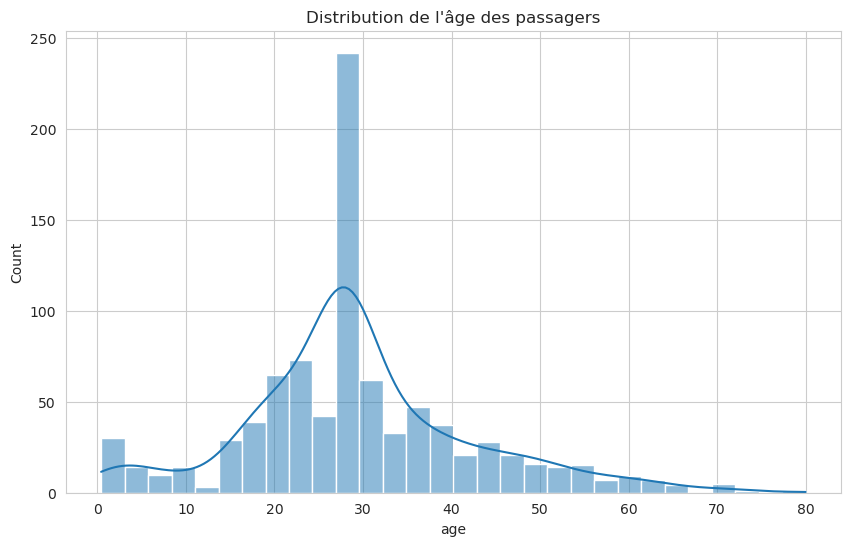

/home/jp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


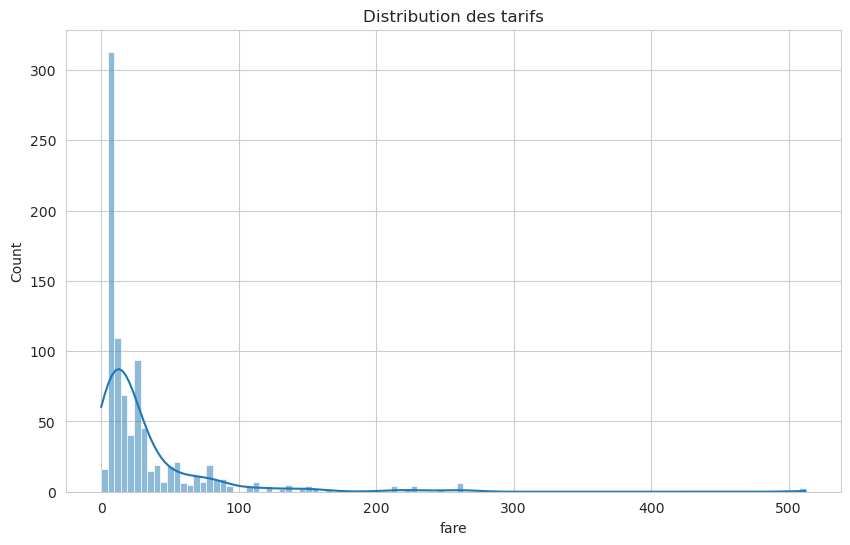

In [149]:
print("Vérification des incohérences dans les données :\n")

# Vérification de l'âge
print("Âges négatifs ou extrêmes :")
print(titanic_df[(titanic_df['age'] < 0) | (titanic_df['age'] > 100)])

# Vérification du tarif
print("\nTarifs négatifs ou nuls :")
print(titanic_df[titanic_df['fare'] <= 0])

# Vérification de la classe
print("\nClasses invalides :")
print(titanic_df[~titanic_df['pclass'].isin([1, 2, 3])])

# Vérification du sexe
print("\nValeurs inhabituelles pour le sexe :")
print(titanic_df[~titanic_df['sex'].isin(['male', 'female'])])

# Vérification de survived
print("\nValeurs invalides pour survived :")
print(titanic_df[~titanic_df['survived'].isin([0, 1])])

# Vérification de adult_male
print("\nValeurs invalides pour adult_male :")
print(titanic_df[~titanic_df['adult_male'].isin([True, False])])

# Vérification de alone
print("\nValeurs invalides pour alone :")
print(titanic_df[~titanic_df['alone'].isin([True, False])])

# Visualisation de la distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['age'].dropna(), kde=True)
plt.title("Distribution de l'âge des passagers")
plt.show()

# Visualisation de la distribution du tarif
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['fare'].dropna(), kde=True)
plt.title("Distribution des tarifs")
plt.show()

### Verifier les données Aberrantes (Outliers)

Des valeurs aberrantes peuvent être présentes dans certaines colonnes, par exemple, des tarifs extrêmement élevés ou des âges très élevés.




Outliers détectés dans la colonne 'age':
      age  pclass   sex  survived
33   66.0       2  male         0
54   65.0       1  male         0
96   71.0       1  male         0
116  70.5       3  male         0
280  65.0       3  male         0
456  65.0       1  male         0
493  71.0       1  male         0
630  80.0       1  male         1
672  70.0       2  male         0
745  70.0       1  male         0
851  74.0       3  male         0


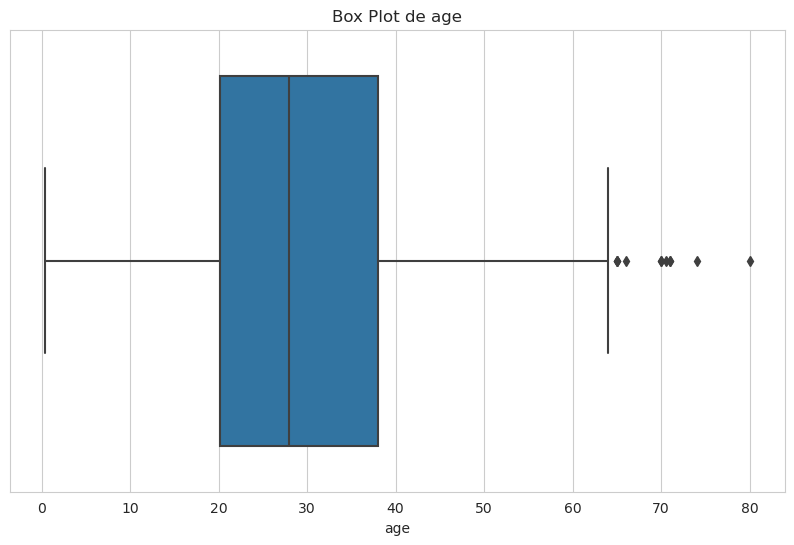

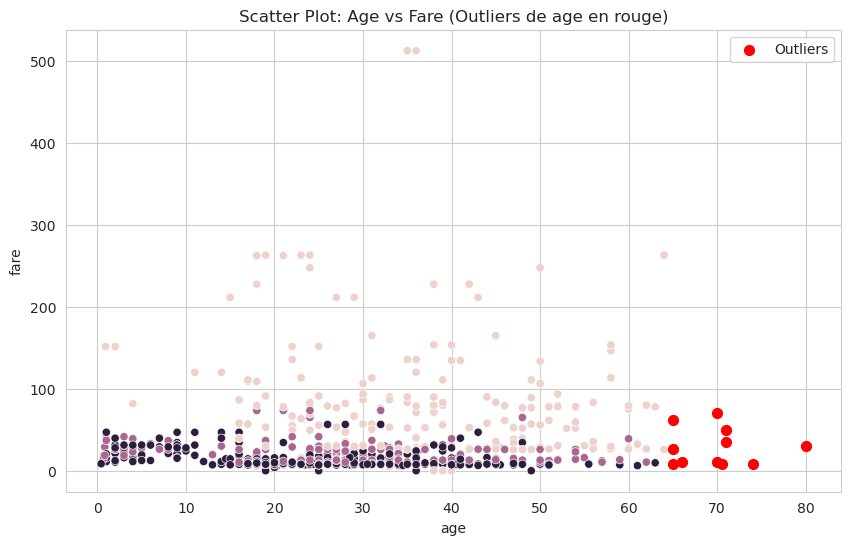


Outliers détectés dans la colonne 'fare':
         fare  pclass     sex  survived
1     71.2833       1  female         1
27   263.0000       1    male         0
31   146.5208       1  female         1
34    82.1708       1    male         0
52    76.7292       1  female         1
..        ...     ...     ...       ...
846   69.5500       3    male         0
849   89.1042       1  female         1
856  164.8667       1  female         1
863   69.5500       3  female         0
879   83.1583       1  female         1

[116 rows x 4 columns]


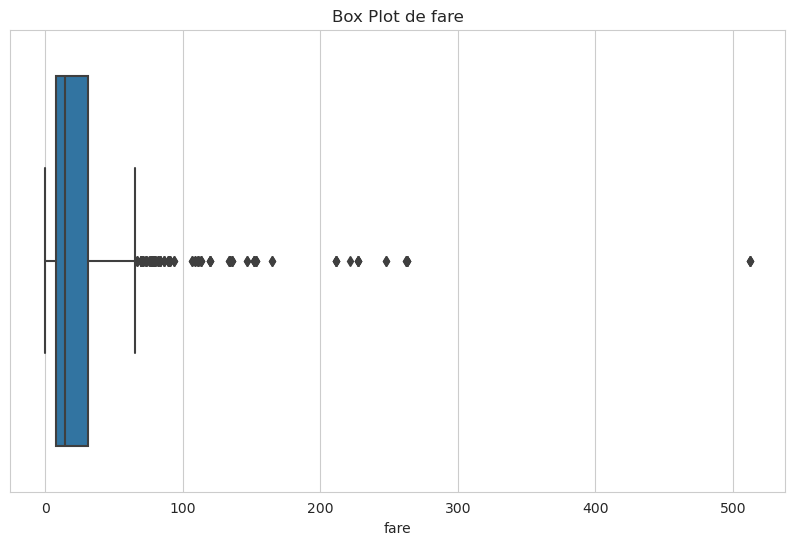

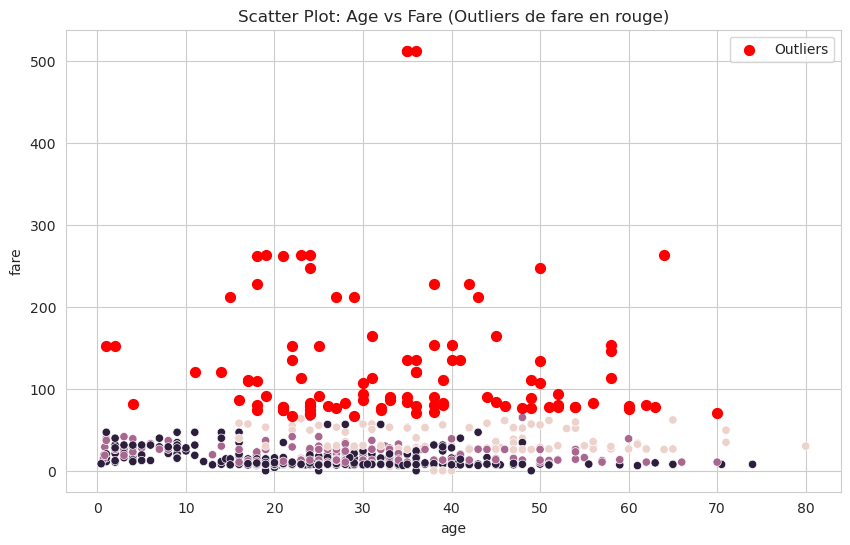


Outliers détectés dans la colonne 'sibsp':
     sibsp  pclass     sex  survived
7        3       3    male         0
16       4       3    male         0
24       3       3  female         0
27       3       1    male         0
50       4       3    male         0
59       5       3    male         0
63       3       3    male         0
68       4       3  female         1
71       5       3  female         0
85       3       3  female         1
88       3       1  female         1
119      4       3  female         0
159      8       3    male         0
164      4       3    male         0
171      4       3    male         0
176      3       3    male         0
180      8       3  female         0
182      4       3    male         0
201      8       3    male         0
229      3       3  female         0
233      4       3  female         1
261      4       3    male         1
266      4       3    male         0
278      4       3    male         0
324      8       3    male     

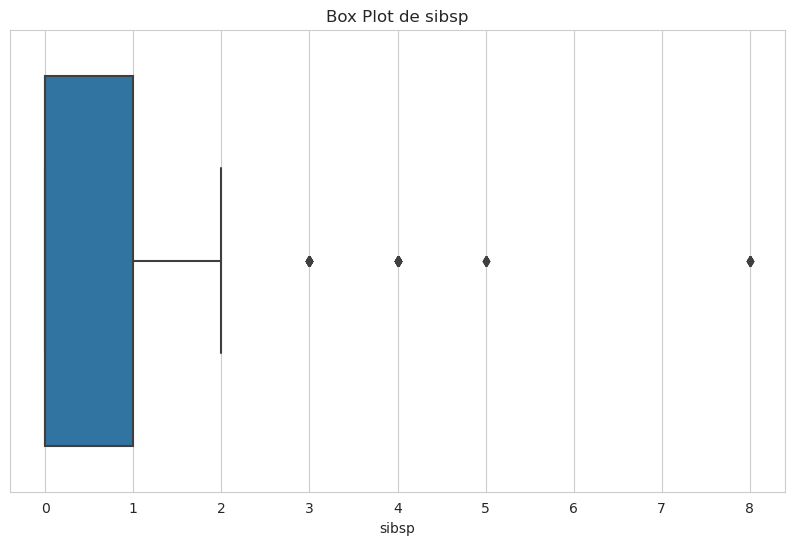


Outliers détectés dans la colonne 'parch':
     parch  pclass     sex  survived
7        1       3    male         0
8        2       3  female         1
10       1       3  female         1
13       5       3    male         0
16       1       3    male         0
..     ...     ...     ...       ...
871      1       1  female         1
879      1       1  female         1
880      1       2  female         1
885      5       3  female         0
888      2       3  female         0

[213 rows x 4 columns]


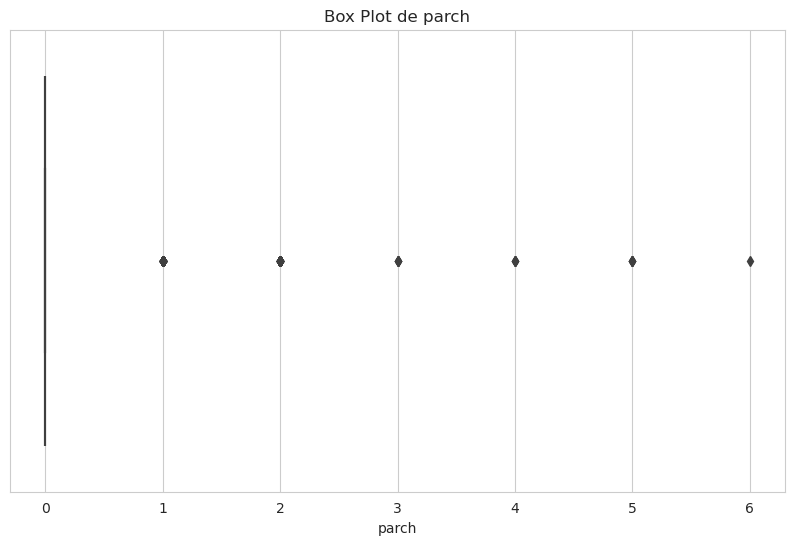

In [151]:
def detecter_visualiser_outliers(df):
    # Sélection des colonnes numériques pertinentes
    colonnes_numeriques = ['age', 'fare', 'sibsp', 'parch']
    
    for col in colonnes_numeriques:
        # Calcul des limites pour les outliers (méthode IQR)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identification des outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        print(f"\nOutliers détectés dans la colonne '{col}':")
        print(outliers[[col, 'pclass', 'sex', 'survived']])
        
        # Visualisation avec un box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f"Box Plot de {col}")
        plt.show()
        
        # Visualisation avec un scatter plot (age vs fare)
        if col in ['age', 'fare']:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x='age', y='fare', hue='pclass')
            plt.title(f"Scatter Plot: Age vs Fare (Outliers de {col} en rouge)")
            outliers_points = plt.scatter(outliers['age'], outliers['fare'], color='red', s=50)
            plt.legend(handles=[outliers_points], labels=['Outliers'], loc='upper right')
            plt.show()

# Chargement des données
titanic_df = sns.load_dataset('titanic')

# Exécution de la fonction
detecter_visualiser_outliers(titanic_df)

### Vérifier les Doublons 


Il peut y avoir des lignes en double dans le dataset, ce qui signifie que les mêmes données apparaissent plusieurs fois et il faut donc les supprimer

In [154]:
duplicate_count = titanic_df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {duplicate_count}")

Nombre de lignes dupliquées : 107


In [155]:
if duplicate_count > 0:
    print("Lignes dupliquées :")
    print(titanic_df[titanic_df.duplicated()])
else:
    print("Aucune ligne dupliquée trouvée.")

Lignes dupliquées :
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female   NaN      0      0   7.7500        Q   Third   
76          0       3    male   NaN      0      0   7.8958        S   Third   
77          0       3    male   NaN      0      0   8.0500        S   Third   
87          0       3    male   NaN      0      0   8.0500        S   Third   
95          0       3    male   NaN      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male   NaN      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male deck  em

In [156]:
if duplicate_count > 0:
    titanic_df_clean = titanic_df.drop_duplicates()
    print(f"Nombre de lignes après suppression des doublons : {len(titanic_df_clean)}")
else:
    titanic_df_clean = titanic_df
    print("Aucune suppression nécessaire.")

Nombre de lignes après suppression des doublons : 784


In [161]:
final_duplicate_count = titanic_df_clean.duplicated().sum()
print(f"Nombre final de lignes dupliquées : {final_duplicate_count}")

Nombre final de lignes dupliquées : 0


### Vérifier si colonnes Inutiles 

Certaines colonnes peuvent contenir des données redondantes ou inutiles pour l'analyse.

In [164]:
# 1. Vérifier les colonnes avec beaucoup de valeurs manquantes
def check_missing_values(df, threshold=0.5):
    missing_ratio = df.isnull().mean()
    columns_to_drop = missing_ratio[missing_ratio > threshold].index
    print("Colonnes avec plus de {:.0%} de valeurs manquantes :".format(threshold))
    print(columns_to_drop.tolist())
check_missing_values(titanic_df)



Colonnes avec plus de 50% de valeurs manquantes :
['deck']


In [166]:
# 2. Vérifier les colonnes avec une seule valeur unique
def check_single_value_columns(df):
    single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
    print("\nColonnes avec une seule valeur unique :")
    print(single_value_columns)
check_single_value_columns(titanic_df)


Colonnes avec une seule valeur unique :
[]


In [167]:
# 3. Vérifier les colonnes hautement corrélées
def check_high_correlation(df, threshold=0.95):
    correlation_matrix = df.select_dtypes(include=[np.number]).corr().abs()
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr_cols = [column for column in upper.columns if any(upper[column] > threshold)]
    print("\nColonnes hautement corrélées (seuil : {}) :".format(threshold))
    print(high_corr_cols)
check_high_correlation(titanic_df)


Colonnes hautement corrélées (seuil : 0.95) :
[]


In [170]:
# 4. Vérifier les colonnes avec beaucoup de valeurs uniques (pour les catégorielles)
def check_high_cardinality(df, threshold=0.5):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    high_cardinality_cols = [col for col in categorical_columns if (df[col].nunique() / len(df)) > threshold]
    print("\nColonnes catégorielles avec haute cardinalité (>{}% de valeurs uniques) :".format(threshold*100))
    print(high_cardinality_cols)
check_high_cardinality(titanic_df)


Colonnes catégorielles avec haute cardinalité (>50.0% de valeurs uniques) :
[]


## Bonus

**Continuez l'exploration du dataset Titanic avec d'autres axes d'analyse **


/home/jp/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


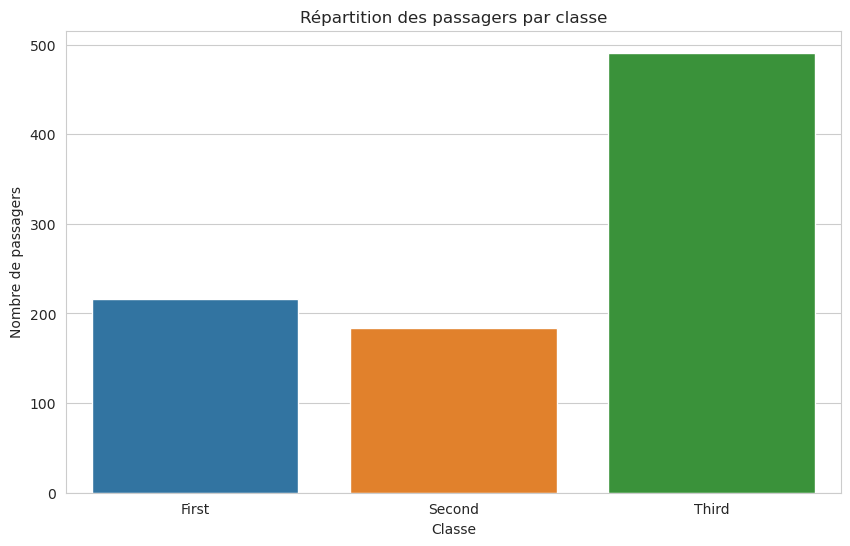

class
Third     491
First     216
Second    184
Name: count, dtype: int64


In [174]:
#1-Quelle est la répartition des passagers par classe (1ère, 2ème, 3ème) à bord du Titanic ?
class_distribution = titanic_df['class'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Répartition des passagers par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

print(class_distribution)

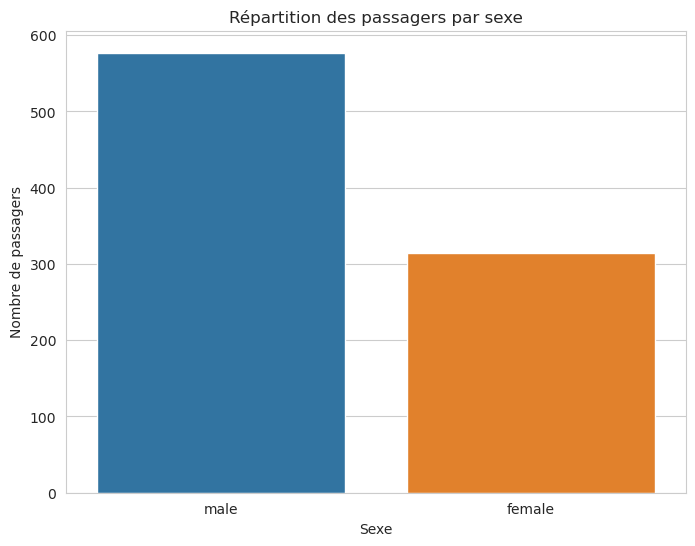

sex
male      577
female    314
Name: count, dtype: int64


In [176]:
#2- Quelle est la répartition des passagers par sexe à bord du Titanic ?
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=titanic_df)
plt.title('Répartition des passagers par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.show()

# Affichage des valeurs
print(sex_distribution)


Nombre de survivants : 342
Taux de survie : 38.38%


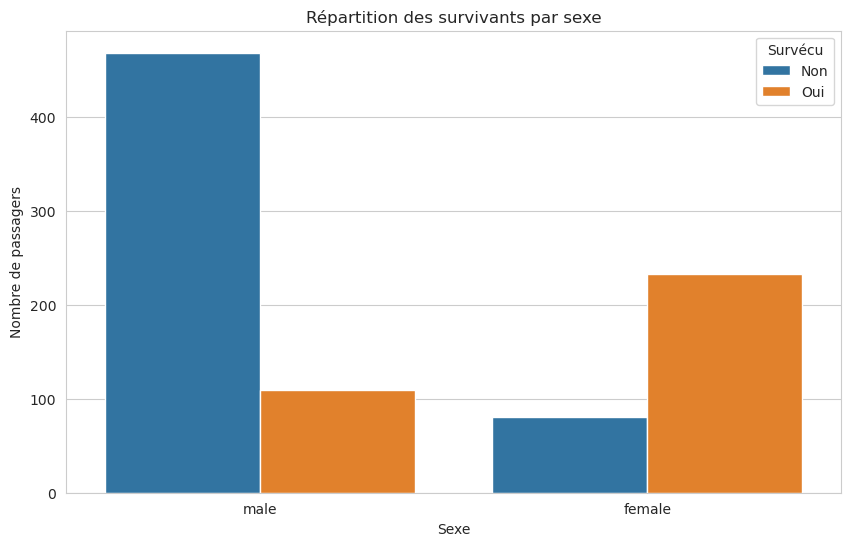

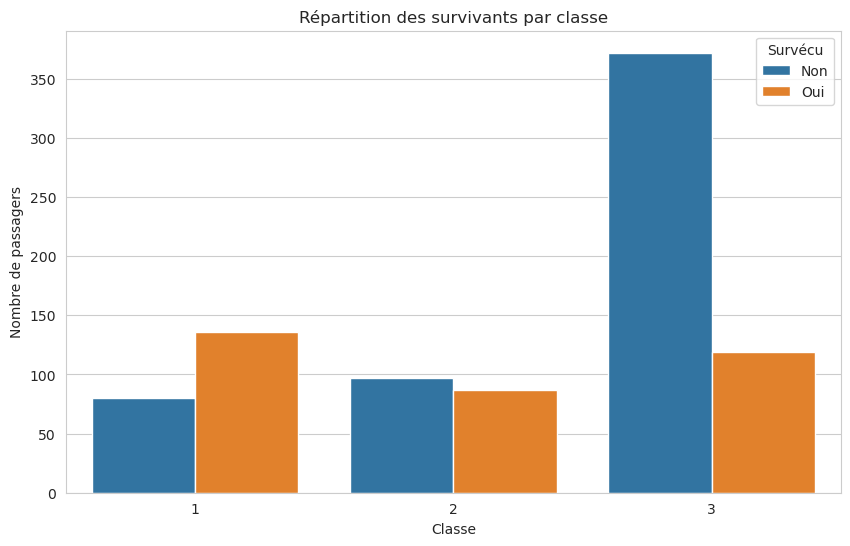

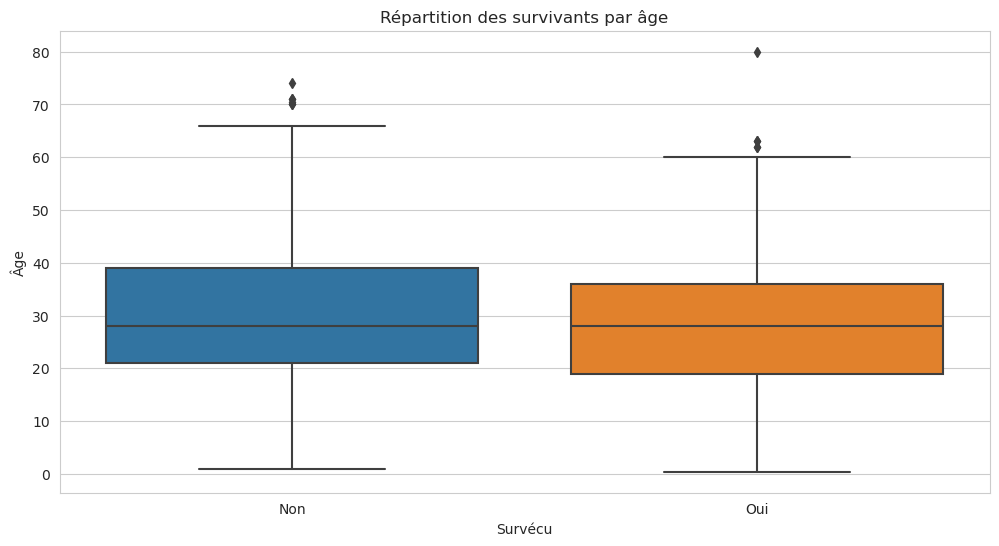

In [177]:
# 3- Quel était l'âge moyen des passagers à bord du Titanic ? Y avait-il des passagers très jeunes ou très âgés ?

survivors = titanic_df['survived'].sum()
total_passengers = len(titanic_df)
survival_rate = (survivors / total_passengers) * 100

print(f"Nombre de survivants : {survivors}")
print(f"Taux de survie : {survival_rate:.2f}%")

# Convertir la colonne 'survived' en chaînes de caractères
titanic_df['survived'] = titanic_df['survived'].astype(str)
#4- Combien de passagers ont survécu au naufrage du Titanic ? Quelle était leur répartition par classe, sexe et âge ?

# Répartition des survivants par sexe
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='sex', hue='survived')
plt.title('Répartition des survivants par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.legend(title='Survécu', labels=['Non', 'Oui'])
plt.show()

# Répartition des survivants par classe
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='pclass', hue='survived')
plt.title('Répartition des survivants par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.legend(title='Survécu', labels=['Non', 'Oui'])
plt.show()
# Répartition des survivants par âge
plt.figure(figsize=(12, 6))
sns.boxplot(data=titanic_df, x='survived', y='age')
plt.title('Répartition des survivants par âge')
plt.xlabel('Survécu')
plt.ylabel('Âge')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.show()